<a href="https://colab.research.google.com/github/berthine/SIAM-Summer-School/blob/main/SIAM2021_NN_Functional_API_Classification_exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Practical: Keras Functional API - Classification
(21/July/2021)

### 2021 Gene Golub SIAM Summer School 
https://sites.google.com/aims.ac.za/g2s3/home 

Instructor

<font color="green">***Dr. Emmanuel Dufourq*** 

www.emmanueldufourq.com

edufourq (['@']) gmail.com

***African Institute for Mathematical Sciences***

***Stellenbosch University***

***2021***


## <font color="green"> Learning outcomes:

* Implement a neural network using the Functional API as opposed to Sequential Model

* Use ```sklearn.preprocessing.LabelEncoder``` to deal with string labels represented as numbers

## <font color="green">Data information:

* Features: numerical features of health-related telephone surveys

* Output: 1 label containing 3 classes (strings)

## <font color="green">Tasks for participants (boolean)?

* Yes, at the end (try avoid copy/pasting code, rather write it out)

## Various Python imports

In [ ]:
import numpy as np
np.random.seed(1337)
import pandas as pd

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import metrics
from keras.utils import np_utils
import tensorflow as tf
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.initializers import RandomNormal
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.utils import plot_model

from tensorflow.keras.models import Model
from tensorflow.keras.layers import Flatten, Dense, Input, Dropout

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.datasets import load_iris

import matplotlib.pyplot as plt
%matplotlib inline

Let us speed through the data pre-processing steps. We will load the iris dataset, get the features and the target. Then we convert the targets to their corresponding one-hot encoded vectors.

In [ ]:
iris_data = load_iris()
dataset = iris_data.data
X = dataset
Y = iris_data.target
Y = np_utils.to_categorical(Y)

Check the shape of X and Y as this is important. When creating models you need to know the input and output shapes

In [ ]:
print (X.shape)
print (Y.shape)

When using the functional API a network is defined in 3 parts

* Input
* the architecture
* the Model (combines Input and architecture)

The first step is to define an Input. We need to specify the shape of the input. We can have multiple inputs. This dataset only has one input made up of 4 features. Here additionally, we are assigning a name to each layer.

https://www.tensorflow.org/api_docs/python/tf/keras/Input

In [ ]:
input1 = Input(shape=(4), name='Input1')

Now that we have defined the input, we have to define the architecture. This is defined slightly differently compared to creating sequential models. The overall format looks like this:

``` name = Layer(...)(previous_layer)```

In the example below we are creating a fully connected layer. The layer before that is the input layer, in our case it is called ```input1```. We assign all of this to a new variable called ```x```. You can use any name.

In [ ]:
x = Dense(32, activation="relu", name='dense_layer_1')(input1)

Next let's add dropout. We link dropout to the layer before which is called ```x```. We assign this result to the variable ```x```. You could use different names.

API for dropout: https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dropout

In [ ]:
x = Dropout(rate=0.5, name='dropout1')(x)

Now let's add another fully connected layer. We have to link it to the previous layer which is called ```x```. Had we given the previous layer a different name, e.g. ```x2``` then we would have written the code as follows:

```x = Dense(32, activation="relu", name='dense_layer_2')(x2)```

In [ ]:
x = Dense(32, activation="relu", name='dense_layer_2')(x)

Now we add another dropout operation.

In [ ]:
x = Dropout(rate=0.5, name='dropout2')(x)

Now we add our softmax output. Again we link it to the previous layer which we called ```x```. In this case we decided to assign all of this to a variable called ```output_softmax```. You could use another name.

In [ ]:
output_softmax = Dense(3, activation="softmax", name='output_softmax')(x)

Finally we create the Model. The model needs two things, all the inputs and all the outputs. For this problem we only have one input and one output. Our input has 4 features and our output has 3 softmax values. Since we called out Input as ```input1``` we specify so below. Since we called out final layer as ```output_softmax``` we specify so below.

In [ ]:
model = Model(inputs=input1, outputs=output_softmax, name="model_1")

This seems trick as first but if you look carefully there is a pattern of connected layers by specifying the layer that comes before it. As long as you get the names write then you'll be able to create your model. I have added a figure below to try help with this idea.

This functional API allows us to create complex models. The sequential model creates a linear stack of layers. But the functional API lets you create any type of model where one layer can be connected to any other layer. You can have multiple inputs and multiple outputs. To specify multiple inputs you write them as an array, e.g. ```inputs=[input1, input2]```.

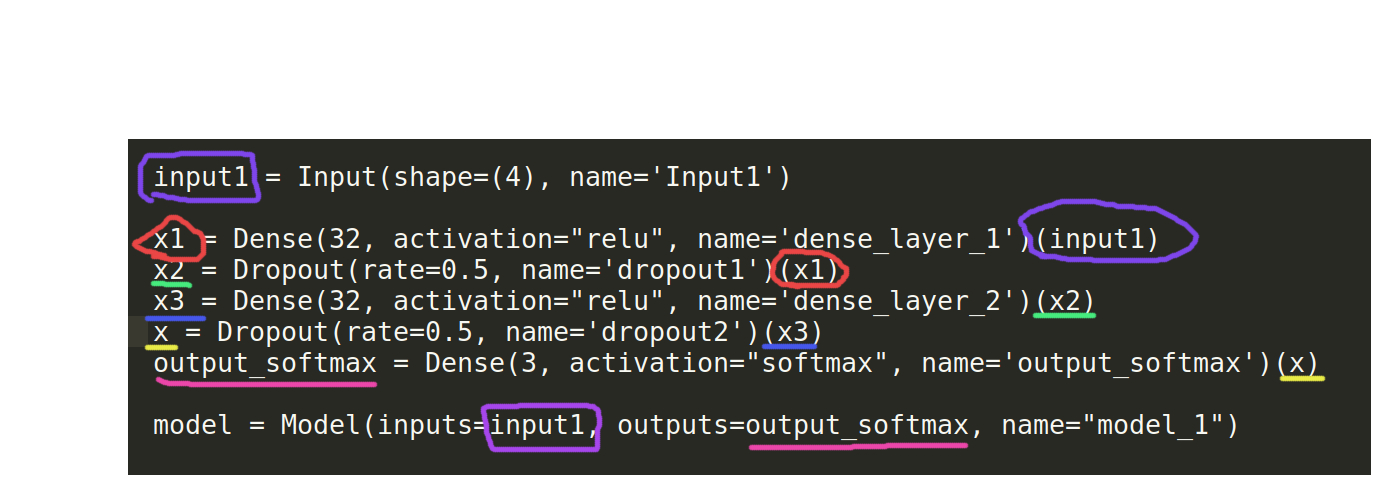

Now let's view the model just like normal

In [ ]:
model.summary()

A different view of the model. Take note of the layer names

In [ ]:
plot_model(model, show_shapes=True)

Now we define the optimiser, specify the loss function and compile the model just like normal. In this case we are using a different optimiser, the RMSprop.

API for RMSprop: https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/RMSprop

In [ ]:
# Define the optimiser
optimiser = RMSprop()

# Define the loss function
loss = CategoricalCrossentropy()

# Compile model
model.compile(loss=loss, optimizer=optimiser, metrics=['accuracy'])

In [ ]:
model.fit(X, Y,epochs = 100)

<hr>

## More complex models!

We won't be implementing multi-branch models but here is an example of what can be achieved. I hope that you can see how such a model is possible by 'linking' the inputs/outputs of each layer and then combining everything using Model()

<br><br>

The functional API is here https://www.tensorflow.org/guide/keras/functional

Here is an example of a more complex model with three inputs and two outputs.

For example, if you're building a system for ranking customer issue tickets by priority and routing them to the correct department, then the model will have three inputs:

    the title of the ticket (text input),
    the text body of the ticket (text input), and
    any tags added by the user (categorical input)

This model will have two outputs:

    the priority score between 0 and 1 (scalar sigmoid output), and
    the department that should handle the ticket (softmax output over the set of departments).




![](https://www.tensorflow.org/guide/keras/functional_files/output_52c4dc6fd93e_0.png)



## Task

Create a module using the Functional API to build a classifier for the following dataset.

### Load the dataset

Let's load this dataset and then investigate. This is not totally uncommon to a real world situation where someone (e.g. a client) might provide you with some data and expect you to write a model for predicting something. We are told in advance that the class is labelled as '_RFHLTH' and that we need to create a classifier to this.

The dataset contains 329 features and 1 target and is the 2015 Behavioral Risk Factor Surveillance System survey.

The features represent a number of characteristics about each patient. The classes denote the health condition of a patient (1 = good, 2 = fair/poor health and 9 = Don’t know/ Not Sure Or Refused/Missing)

In [ ]:
dataset = pd.read_csv('https://drive.google.com/uc?export=download&id=1qXaIYmJ7kEqzlXER2-2hAfIp6rP6MA5n')

### View the top 5 rows

Let's take a look at the data

In [ ]:
dataset.head()

In [ ]:
len(dataset)

From the above, we know that the dataset has 9368 examples, 329 features and we already know that we have 1 class target. Next we need to find out how many values are in the class.

### Find the unique classes

In [ ]:
dataset['_RFHLTH'].unique()

## Task

On paper please tackle these questions:


1) How many inputs would a neural network have if we tried to solve this problem?

2) How many outputs would the neural network have?

3) What loss function do you expect we might use?

4) What activation function in the last layer do you expect we might use?

### Preprocessing

Assume that we are told by the client that we can ignore certain columns: ['POORHLTH', 'PHYSHLTH', 'GENHLTH', 'PAINACT2', 'QLMENTL2', 'QLSTRES2', 'QLHLTH2', 'HLTHPLN1', 'MENTHLTH','IDATE']. Here we drop those columns. We also selecting columns containing numerical values. We are also dropping columns that have NaNs.

In [ ]:
dataset.drop(columns = ['POORHLTH', 'PHYSHLTH', 'GENHLTH', 'PAINACT2', 
                        'QLMENTL2', 'QLSTRES2', 'QLHLTH2', 'HLTHPLN1', 'MENTHLTH','IDATE'], inplace=True)

dataset = dataset.select_dtypes('number')
dataset = dataset.dropna(axis=1)

### Split the data into features and target

In [ ]:
X= dataset.drop('_RFHLTH', axis = 1)
Y = np.array(dataset['_RFHLTH'])

Let's look at the features

In [ ]:
X

### Do we need to scale the features? If so, add your code here.

In [ ]:
# to do

In [ ]:
np.unique(Y)

We have a problem with one hot encoding here. Since we have a target of 9, the default behaviour will create vectors of dimension = 10 if we use the to_categorical() function. But we don't have 10 classes, only 3! 

Instead, we can use LabelEncoder to transform the labels into integers, which will map everything to: 0, 1, 2... regardless of gaps in the values such as the gap between 2 and 9 in our original dataset. This approach also works when converting text targets into integers, and then into one-hot encoded vectors.

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
Y_encoded = label_encoder.fit_transform(Y)

Now, take a look below. 9 is now mapped to 2 

1 is mapped to 0 and 

2 is mapped to 1

Now we can use one-hot encoding like normal just like in the previous notebook.

In [ ]:
Y[400:410]

In [ ]:
Y_encoded[400:410]

### One hot encode the targets

In [ ]:
Y = # to do

Check the shape after the transformation above

In [ ]:
# to do

## Task

Solve the problem using a neural network. Perform any additional processing that might be required **(e.g. do you think we need to scale the values) Run the code with and without scaling, is there a difference in performance?**


## Task: Split the data into training, validation and testing data

In [ ]:
# to do

## Create a model using the functional API. Define the optimiser, loss and compile

* make sure you include a dropout operation to check that you are comfortable with it

In [ ]:
# to do

# Print a summary of the model

In [ ]:
# to do

## Train the model

In [ ]:
# to do

## Plot the training error

In [ ]:
# to do

## Evaluate the model on the test data. Compute the confusion matrix and determine the test accuracy.

In [ ]:
# to do

The model doesn't perform well on the minority class. But we can try to address that via other data-science techniques like oversampling, stratified validation etc... Those issues are more data manipulation areas than deep learning.